In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [5]:
df = pd.read_csv('final_dataset_1.csv')

In [11]:
df = df.drop(columns=["Unnamed: 0"])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [12]:
df['HTFormPts'] = pd.to_numeric(df['HTFormPts'], errors='coerce')
df['ATFormPts'] = pd.to_numeric(df['ATFormPts'], errors='coerce')
df['DiffPts'] = pd.to_numeric(df['DiffPts'], errors='coerce')
df['DiffFormPts'] = pd.to_numeric(df['DiffFormPts'], errors='coerce')

In [13]:
df_clean = df.dropna(subset=['HTFormPts', 'ATFormPts', 'DiffPts', 'DiffFormPts'])

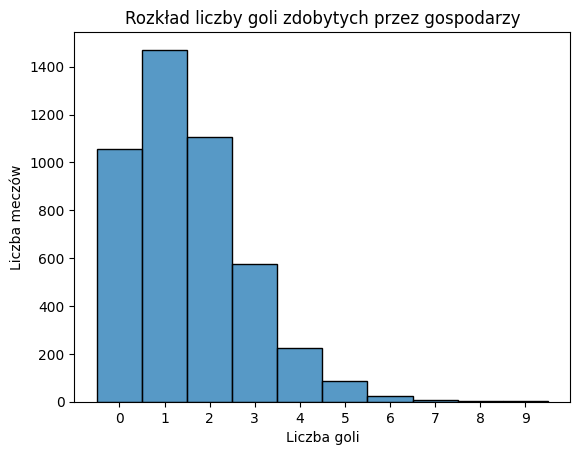

In [16]:
sns.histplot(df_clean['FTHG'], bins=range(int(df_clean['FTHG'].min()), int(df_clean['FTHG'].max())+2), discrete=True)
plt.title('Rozkład liczby goli zdobytych przez gospodarzy')
plt.xlabel('Liczba goli')
plt.ylabel('Liczba meczów')
plt.xticks(range(int(df_clean['FTHG'].min()), int(df_clean['FTHG'].max())+1))
plt.show()

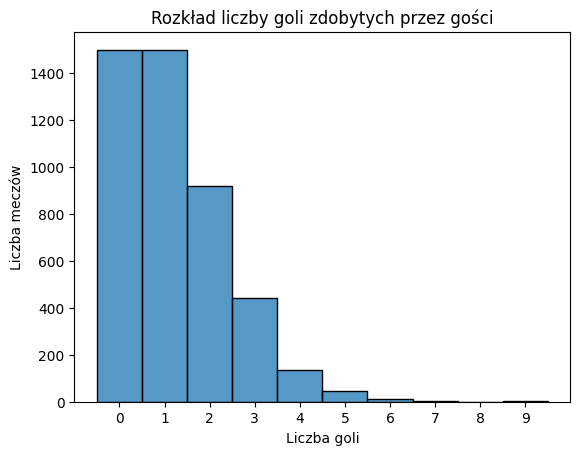

In [19]:
sns.histplot(
    df_clean['FTAG'],
    bins=range(int(df_clean['FTAG'].min()), int(df_clean['FTAG'].max())+2),
    discrete=True
)
plt.title('Rozkład liczby goli zdobytych przez gości')
plt.xlabel('Liczba goli')
plt.ylabel('Liczba meczów')
plt.xticks(range(int(df_clean['FTAG'].min()), int(df_clean['FTAG'].max())+1))
plt.show()

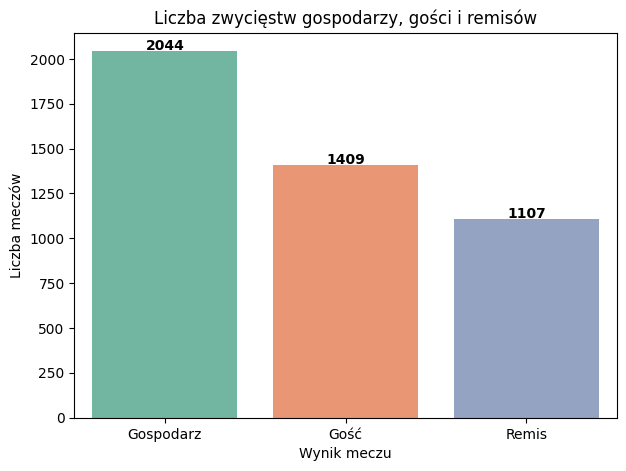

In [20]:
# Wykres liczby zwycięstw gospodarzy, gości i remisów
result_counts = df_clean['FTR'].value_counts().reindex(['H', 'A', 'D'], fill_value=0)
result_labels = ['Gospodarz', 'Gość', 'Remis']

plt.figure(figsize=(7,5))
sns.barplot(x=result_labels, y=result_counts.values, palette='Set2')
plt.title('Liczba zwycięstw gospodarzy, gości i remisów')
plt.xlabel('Wynik meczu')
plt.ylabel('Liczba meczów')

# Dodaj liczby nad słupkami
for i, v in enumerate(result_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.show()

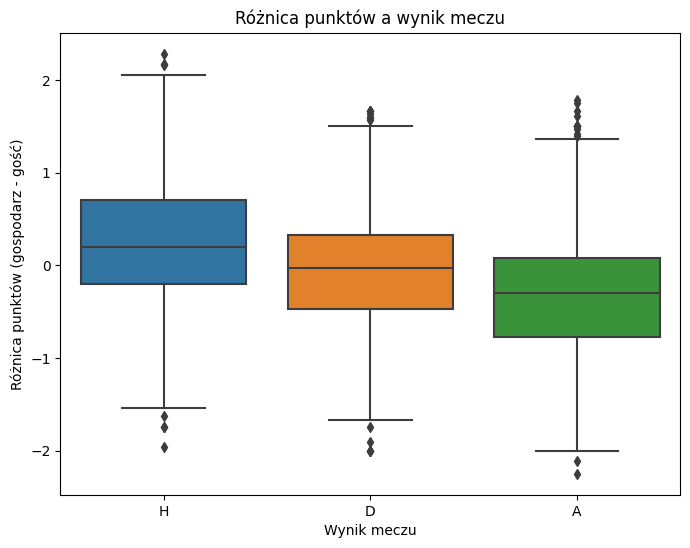

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='FTR', y='DiffPts', data=df_clean, order=['H', 'D', 'A'])
plt.title('Różnica punktów a wynik meczu')
plt.xlabel('Wynik meczu')
plt.ylabel('Różnica punktów (gospodarz - gość)')
plt.show()

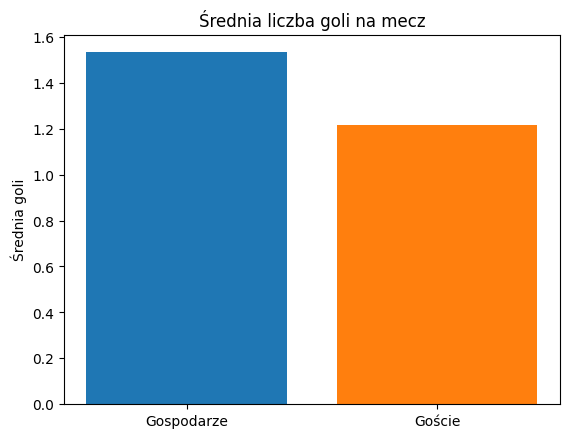

In [23]:
avg_goals = [df_clean['FTHG'].mean(), df_clean['FTAG'].mean()]
labels = ['Gospodarze', 'Goście']
plt.bar(labels, avg_goals, color=['#1f77b4', '#ff7f0e'])
plt.title('Średnia liczba goli na mecz')
plt.ylabel('Średnia goli')
plt.show()